In [2]:
!pip install networkx
!pip install matplotlib
!pip install numpy

  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)


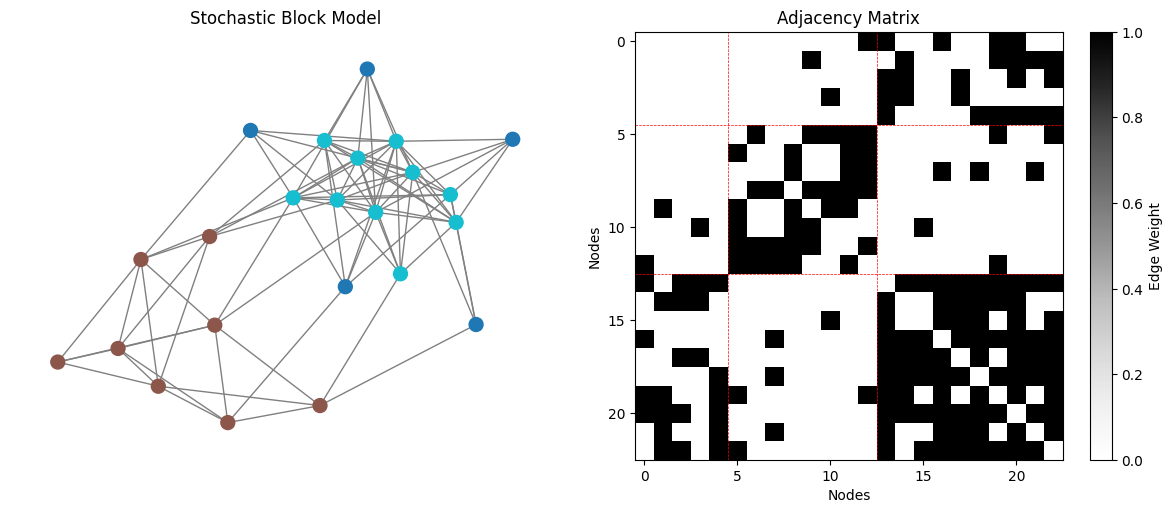

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_sbm_graph(block_sizes, p_matrix):
    # Validate the connectivity matrix
    n_blocks = len(block_sizes)
    if p_matrix.shape != (n_blocks, n_blocks):
        raise ValueError("The connectivity matrix dimensions must match the number of blocks.")
    if np.any(p_matrix < 0) or np.any(p_matrix > 1):
        raise ValueError("All probabilities in the connectivity matrix must be between 0 and 1.")

    # Generate Stochastic Block Model graph
    G = nx.stochastic_block_model(block_sizes, p_matrix)

    # Get adjacency matrix
    adj_matrix = nx.to_numpy_array(G)

    # Assign colors based on block membership
    colors = [G.nodes[node]['block'] for node in G.nodes]

    # Plotting the graph
    pos = nx.spring_layout(G, seed=42)  # For consistent layout
    plt.figure(figsize=(12, 5))

    # Subplot 1: SBM graph
    plt.subplot(1, 2, 1)
    nx.draw(G, pos, node_color=colors, cmap=plt.cm.tab10, with_labels=False,
            node_size=100, edge_color='gray')
    plt.title('Stochastic Block Model')

    # Subplot 2: Adjacency matrix with visible block structure
    plt.subplot(1, 2, 2)
    plt.imshow(adj_matrix, cmap='Greys', interpolation='none')
    plt.colorbar(label='Edge Weight')
    plt.title('Adjacency Matrix')
    plt.xlabel('Nodes')
    plt.ylabel('Nodes')

    # Overlay block boundaries for visual separation
    block_boundaries = np.cumsum([0] + block_sizes)
    for boundary in block_boundaries:
        plt.axhline(boundary - 0.5, color='red', linestyle='--', linewidth=0.5)
        plt.axvline(boundary - 0.5, color='red', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

# Example usage
block_sizes = [5, 8, 10]  # Sizes of each block
p_matrix = np.array([[0, 0.1, 0.5],
                     [0.1, 0.6, 0.1],
                     [0.5, 0.1, 0.8]])  # Full inter-block connectivity matrix

plot_sbm_graph(block_sizes, p_matrix)
